<a href="https://colab.research.google.com/github/yohannes242005/thesis/blob/main/1last_print_commont.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import os
import glob
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import keras
from keras.models import Sequential, Model,load_model
#from keras.optimizers import SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense,Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
import matplotlib.pyplot as plt
from keras import backend as K



from keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform

In [3]:
def k_means_segmentation(img):
  twoDimage = img.reshape((-1,3))
  twoDimage = np.float32(twoDimage)
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
  K = 2
  attempts=1
  ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
  center = np.uint8(center)
  res = center[label.flatten()]
  result_image = res.reshape((img.shape))
  return result_image

In [4]:
def color_mask_segmentation(img):
  hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
  light_blue = (90, 70, 50)
  dark_blue = (128, 255, 255)
  # You can use the following values for green
  light_green = (40, 40, 40)
  # dark_greek = (70, 255, 255)
  mask = cv2.inRange(hsv_img, light_blue, dark_blue)
  result = cv2.bitwise_and(img, img, mask=mask)
  return result

In [5]:
SIZE = 128
train_image = []
train_label = []
for dir_path in glob.glob("/content/drive/My Drive/final pepper dataset one folder3,330/*"):
    label = dir_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(dir_path,"*.jpg")):
        print(img_path)
        img = cv2.imread(img_path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(SIZE,SIZE))
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        #img = color_mask_segmentation(img)
        #img = cv2.GaussianBlur(img,(5,5),0)

        train_image.append(img)
        train_label.append(label)
train_image = np.array(train_image)
train_label = np.array(train_label)

/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/78Fr.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/89Fr.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/1.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/2.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/3.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/4.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/5.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/6.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/7.jpg
/content/drive/My Drive/final pepper dataset one folder3,330/fruit rot disease 482/8.jpg
/content/drive/My Dri

In [6]:
from sklearn import preprocessing
from keras.utils.all_utils import to_categorical

le = preprocessing.LabelEncoder()
le.fit(train_label)
train_labe_encoded = le.transform(train_label)

x_train,y_train = train_image,train_labe_encoded
x_train = x_train/255.0
y_train_one_hot = to_categorical(y_train)

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_train,y_train_one_hot,test_size=0.30,shuffle=True,random_state=42,stratify=y_train_one_hot)

x_validation,x_test,y_validation,y_test = train_test_split(x_test,y_test,test_size=0.5,shuffle=True,random_state=42,stratify=y_test)

In [8]:
model_1 = Sequential()
model_1.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape = (128,128,3)))
model_1.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))


model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model_1.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation="relu"))

model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model_1.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation="relu"))

model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model_1.add(BatchNormalization())

model_1.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation="relu"))
model_1.add(Conv2D(filters=3, kernel_size=(3,3), padding="same", activation="relu"))

model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model_1.add(BatchNormalization())

model_1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [9]:
model_1.add(Flatten())
#model_1.add(Dropout(0.005))
model_1.add(Dense(units=6, activation="softmax"))
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 3)         1731      
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 3)         84        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 3)        0         
 2D)                                                    

In [10]:
# tell the model what cost and optimization method to use
model_1.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# fit the model
r = model_1.fit(x_train,y_train,epochs=100,validation_data=(x_validation,y_validation))

Epoch 1/100
70/70 [==============================] - 16s 63ms/step - loss: 1.6615 - accuracy: 0.3566 - val_loss: 1.7741 - val_accuracy: 0.1712
Epoch 2/100
70/70 [==============================] - 3s 38ms/step - loss: 1.0310 - accuracy: 0.6559 - val_loss: 1.7735 - val_accuracy: 0.1712
Epoch 3/100
70/70 [==============================] - 3s 40ms/step - loss: 0.7568 - accuracy: 0.7834 - val_loss: 1.8088 - val_accuracy: 0.1712
Epoch 4/100
70/70 [==============================] - 3s 41ms/step - loss: 0.6363 - accuracy: 0.8045 - val_loss: 2.1747 - val_accuracy: 0.1712
Epoch 5/100
70/70 [==============================] - 3s 38ms/step - loss: 0.5650 - accuracy: 0.8260 - val_loss: 2.1665 - val_accuracy: 0.1712
Epoch 6/100
70/70 [==============================] - 3s 38ms/step - loss: 0.5081 - accuracy: 0.8394 - val_loss: 1.6279 - val_accuracy: 0.3111
Epoch 7/100
70/70 [==============================] - 3s 39ms/step - loss: 0.4201 - accuracy: 0.8747 - val_loss: 1.3506 - val_accuracy: 0.4530
Epoch

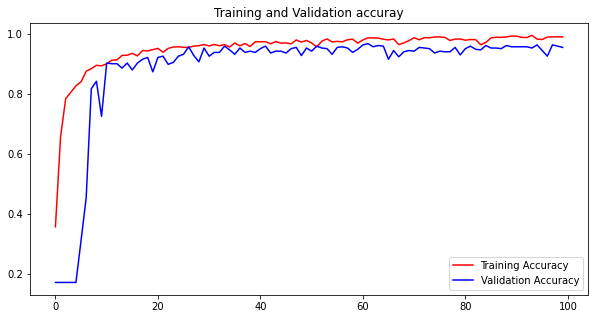

<Figure size 2160x1080 with 0 Axes>

In [12]:
acc = r.history['accuracy']

val_acc = r.history['val_accuracy']

#loss = r.history['loss']

#val_loss = r.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10,5))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')

plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')

#plt.plot(epochs, loss,'', label = 'loss')

#plt.plot(epochs, val_loss,'', label = 'val loss')

plt.title('Training and Validation accuray')

plt.legend(loc=0)

plt.figure(figsize=(30,15))

#show the graph

plt.show()
#score = conc_model.evaluate(x_validation,y_validation)
#print('Training Accuracy:', score[1])
#print('Testing loss :', score[0])

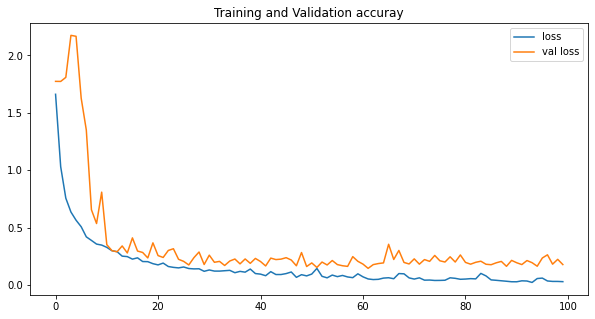

<Figure size 432x288 with 0 Axes>

In [13]:
acc = r.history['accuracy']

#val_acc = r.history['val_accuracy']

loss = r.history['loss']

val_loss = r.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(10,5))

 

#plt.plot(epochs, acc, 'r', label = 'Training Accuracy')

#plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')

plt.plot(epochs, loss,'', label = 'loss')

plt.plot(epochs, val_loss,'', label = 'val loss')

plt.title('Training and Validation accuray')

plt.legend(loc=0)

plt.figure()

#show the graph

plt.show()

<Figure size 2520x360 with 0 Axes>

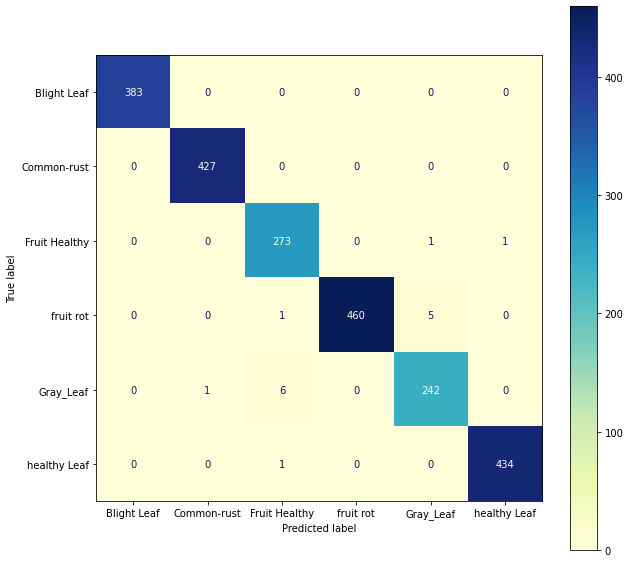

70/70 [==============================] - 1s 10ms/step - loss: 0.0242 - accuracy: 0.9928
Training Accuracy: 0.9928411841392517
Training loss : 0.024212321266531944
               precision    recall  f1-score   support

  Blight Leaf       1.00      1.00      1.00       383
  Common-rust       1.00      1.00      1.00       427
Fruit Healthy       0.97      0.99      0.98       275
    fruit rot       1.00      0.99      0.99       466
    Gray_Leaf       0.98      0.97      0.97       249
 healthy Leaf       1.00      1.00      1.00       435

     accuracy                           0.99      2235
    macro avg       0.99      0.99      0.99      2235
 weighted avg       0.99      0.99      0.99      2235



In [37]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=model_1.predict([x_train])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_y = np.argmax(y_train,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_y, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = model_1.evaluate([x_train],y_train)
print('Training Accuracy:', score[1])
print('Training loss :', score[0])

from sklearn.metrics import classification_report

target_names = ['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf']
print(classification_report(round_pred_y, round_pred, target_names=target_names))

<Figure size 2520x360 with 0 Axes>

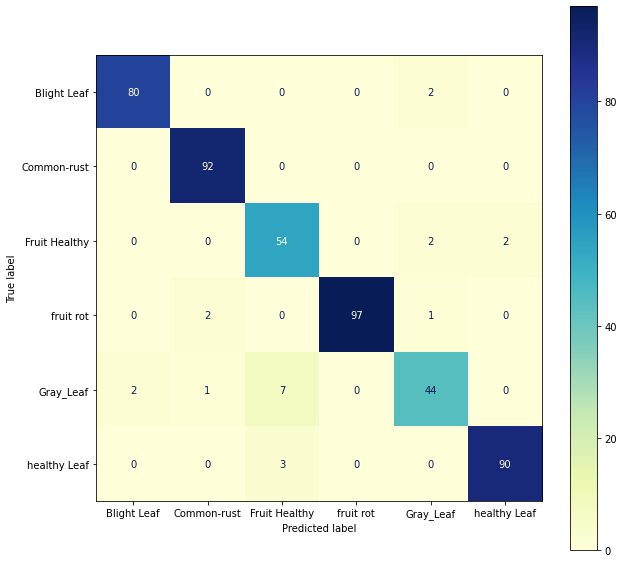

15/15 [==============================] - 0s 13ms/step - loss: 0.1787 - accuracy: 0.9541
Validation Accuracy: 0.9540709853172302
validation loss : 0.17874310910701752
               precision    recall  f1-score   support

  Blight Leaf       0.98      0.98      0.98        82
  Common-rust       0.97      1.00      0.98        92
Fruit Healthy       0.84      0.93      0.89        58
    fruit rot       1.00      0.97      0.98       100
    Gray_Leaf       0.90      0.81      0.85        54
 healthy Leaf       0.98      0.97      0.97        93

     accuracy                           0.95       479
    macro avg       0.94      0.94      0.94       479
 weighted avg       0.96      0.95      0.95       479



In [38]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=model_1.predict([x_validation])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_x = np.argmax(y_validation,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_x, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = model_1.evaluate([x_validation],y_validation)
print('Validation Accuracy:', score[1]) 
print('validation loss :', score[0])

from sklearn.metrics import classification_report

target_names = ['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf']
print(classification_report(round_pred_x, round_pred, target_names=target_names))

<Figure size 2520x360 with 0 Axes>

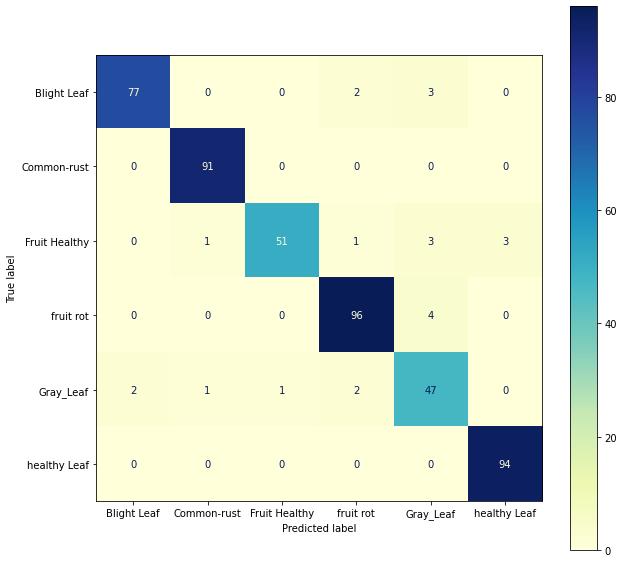

15/15 [==============================] - 0s 15ms/step - loss: 0.1831 - accuracy: 0.9520
Test Accuracy: 0.9519832730293274
Test loss : 0.18311432003974915
               precision    recall  f1-score   support

  Blight Leaf       0.97      0.94      0.96        82
  Common-rust       0.98      1.00      0.99        91
Fruit Healthy       0.98      0.86      0.92        59
    fruit rot       0.95      0.96      0.96       100
    Gray_Leaf       0.82      0.89      0.85        53
 healthy Leaf       0.97      1.00      0.98        94

     accuracy                           0.95       479
    macro avg       0.95      0.94      0.94       479
 weighted avg       0.95      0.95      0.95       479



In [39]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=model_1.predict([x_test])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_z = np.argmax(y_test,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_z, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = model_1.evaluate([x_test],y_test)
print('Test Accuracy:', score[1]) 
print('Test loss :', score[0])

from sklearn.metrics import classification_report

target_names = ['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf']
print(classification_report(round_pred_z, round_pred, target_names=target_names))

AlexNet

In [40]:
# (3) Create a sequential model
model_2 = Sequential()

# (3) Create a sequential model
model_2 = Sequential()

# 1st Convolutional Layer
model_2.add(Conv2D(filters=3, input_shape=(128,128,3), kernel_size=(3,3),\
 strides=(4,4), padding='same'))
model_2.add(Activation('relu'))
# Pooling 
model_2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Batch Normalisation before passing it to the next layer
model_2.add(BatchNormalization())


# 2nd Convolutional Layer
model_2.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same'))
model_2.add(Activation('relu'))
# Pooling
model_2.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model_2.add(BatchNormalization())


# 3rd Convolutional Layer
model_2.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same'))
model_2.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same'))
model_2.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same'))
model_2.add(MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'))
model_2.add(Activation('relu'))
# Batch Normalisation
model_2.add(BatchNormalization())


# 4th Convolutional Layer
model_2.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same'))
model_2.add(Activation('relu'))
# Batch Normalisation
model_2.add(BatchNormalization())


# Add Dropout to prevent overfitting
#model_2.add(Dropout(0.4))
# Batch Normalisation
model_2.add(BatchNormalization())

#  output Layer 
model_2.add(Flatten())
model_2.add(Dense(6,activation='softmax'))

model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 3)         84        
                                                                 
 activation (Activation)     (None, 32, 32, 3)         0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 3)        0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 16, 16, 3)        12        
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 3)         84        
                                                                 
 activation_1 (Activation)   (None, 16, 16, 3)        

In [75]:
# tell the model what cost and optimization method to use
model_2.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [76]:
# fit the model
r = model_2.fit(x_train,y_train,epochs=100,validation_data=(x_validation,y_validation))

Epoch 1/100
70/70 [==============================] - 2s 13ms/step - loss: 2.2957 - accuracy: 0.5101 - val_loss: 1.5855 - val_accuracy: 0.7203
Epoch 2/100
70/70 [==============================] - 1s 9ms/step - loss: 0.7255 - accuracy: 0.7651 - val_loss: 0.8043 - val_accuracy: 0.7975
Epoch 3/100
70/70 [==============================] - 1s 9ms/step - loss: 0.5249 - accuracy: 0.8295 - val_loss: 0.5399 - val_accuracy: 0.8518
Epoch 4/100
70/70 [==============================] - 1s 9ms/step - loss: 0.4480 - accuracy: 0.8506 - val_loss: 0.3900 - val_accuracy: 0.8789
Epoch 5/100
70/70 [==============================] - 1s 9ms/step - loss: 0.4131 - accuracy: 0.8671 - val_loss: 0.3077 - val_accuracy: 0.9061
Epoch 6/100
70/70 [==============================] - 1s 9ms/step - loss: 0.3607 - accuracy: 0.8805 - val_loss: 0.2719 - val_accuracy: 0.9081
Epoch 7/100
70/70 [==============================] - 1s 9ms/step - loss: 0.3253 - accuracy: 0.8957 - val_loss: 0.2515 - val_accuracy: 0.9228
Epoch 8/100


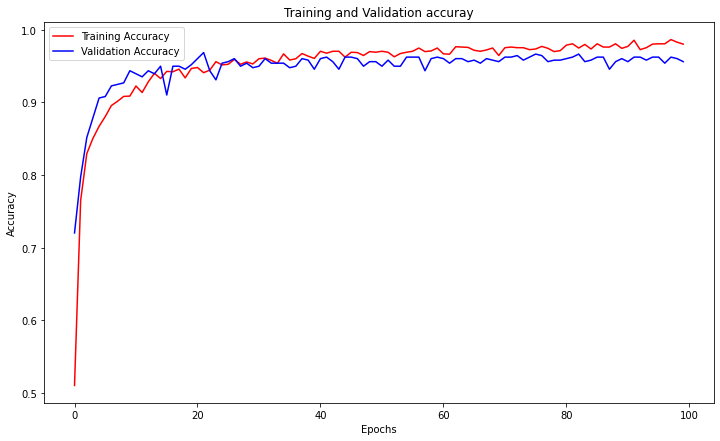

<Figure size 432x288 with 0 Axes>

70/70 [==============================] - 0s 6ms/step - loss: 0.0220 - accuracy: 0.9933


In [79]:
acc = r.history['accuracy']

val_acc = r.history['val_accuracy']

#loss = r.history['loss']

#val_loss = r.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(12,7))

 

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')

plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')

#plt.plot(epochs, loss,'', label = 'loss')

#plt.plot(epochs, val_loss,'', label = 'val loss')

plt.title('Training and Validation accuray')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(loc=0)

plt.figure()

#show the graph

plt.show()
score = model_2.evaluate(x_train,y_train)
#print('Training Accuracy:', score[1])
#print('Training loss :', score[0])

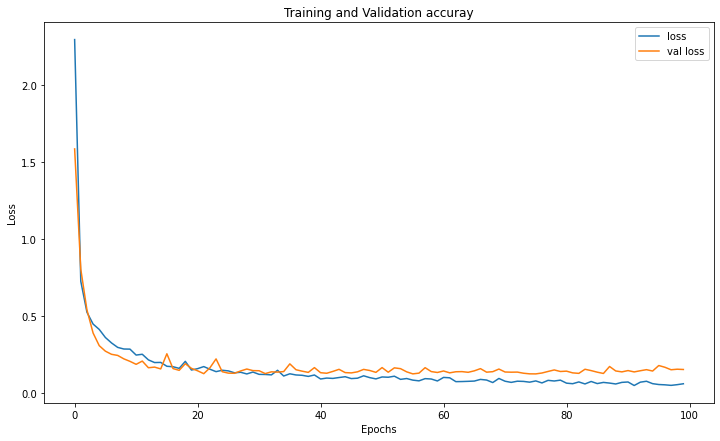

<Figure size 432x288 with 0 Axes>

In [82]:
acc = r.history['accuracy']

#val_acc = r.history['val_accuracy']

loss = r.history['loss']

val_loss = r.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(12,7))

 

#plt.plot(epochs, acc, 'r', label = 'Training Accuracy')

#plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')

plt.plot(epochs, loss,'', label = 'loss')

plt.plot(epochs, val_loss,'', label = 'val loss')

plt.title('Training and Validation accuray')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(loc=0)

plt.figure()

#show the graph

plt.show()

<Figure size 2520x360 with 0 Axes>

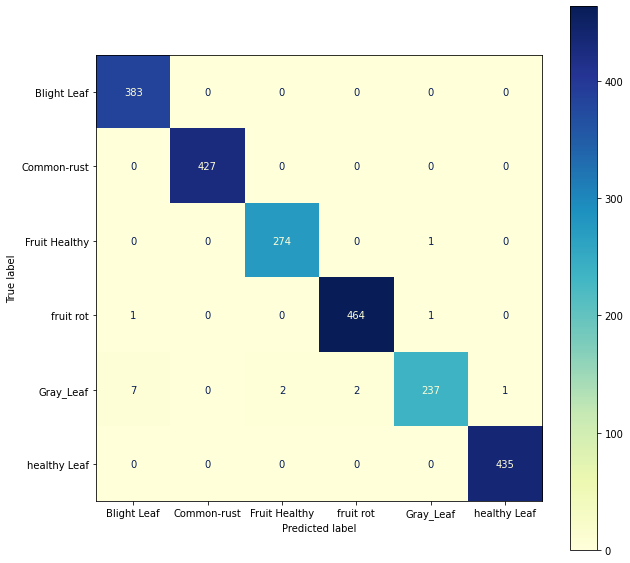

70/70 [==============================] - 1s 10ms/step - loss: 0.0220 - accuracy: 0.9933
Training Accuracy: 0.9932885766029358
Training loss : 0.022041425108909607
               precision    recall  f1-score   support

  Blight Leaf       0.98      1.00      0.99       383
  Common-rust       1.00      1.00      1.00       427
Fruit Healthy       0.99      1.00      0.99       275
    fruit rot       1.00      1.00      1.00       466
    Gray_Leaf       0.99      0.95      0.97       249
 healthy Leaf       1.00      1.00      1.00       435

     accuracy                           0.99      2235
    macro avg       0.99      0.99      0.99      2235
 weighted avg       0.99      0.99      0.99      2235



In [83]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=model_2.predict([x_train])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_f = np.argmax(y_train,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_f, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = model_2.evaluate([x_train],y_train)
print('Training Accuracy:', score[1])
print('Training loss :', score[0])

from sklearn.metrics import classification_report

target_names = ['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf']
print(classification_report(round_pred_f, round_pred, target_names=target_names))

<Figure size 2520x360 with 0 Axes>

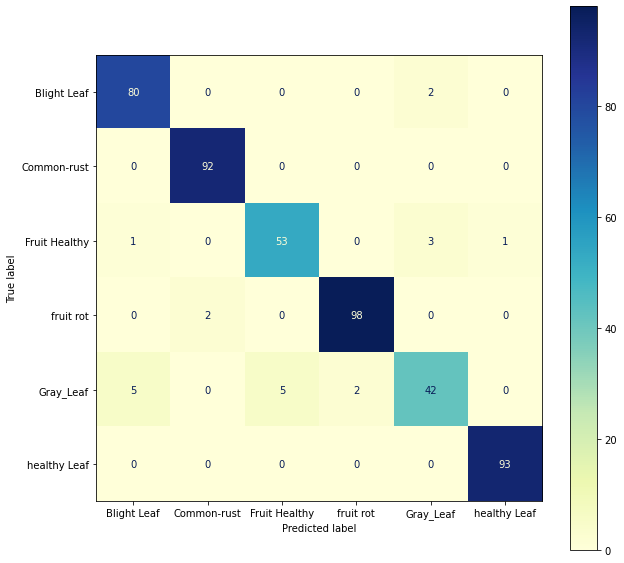

15/15 [==============================] - 0s 10ms/step - loss: 0.1529 - accuracy: 0.9562
Validation Accuracy: 0.9561586380004883
validation loss : 0.15291576087474823
               precision    recall  f1-score   support

  Blight Leaf       0.93      0.98      0.95        82
  Common-rust       0.98      1.00      0.99        92
Fruit Healthy       0.91      0.91      0.91        58
    fruit rot       0.98      0.98      0.98       100
    Gray_Leaf       0.89      0.78      0.83        54
 healthy Leaf       0.99      1.00      0.99        93

     accuracy                           0.96       479
    macro avg       0.95      0.94      0.94       479
 weighted avg       0.96      0.96      0.96       479



In [84]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=model_2.predict([x_validation])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_g = np.argmax(y_validation,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_g, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = model_2.evaluate([x_validation],y_validation)
print('Validation Accuracy:', score[1]) 
print('validation loss :', score[0])

from sklearn.metrics import classification_report

target_names = ['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf']
print(classification_report(round_pred_g, round_pred, target_names=target_names))

<Figure size 2520x360 with 0 Axes>

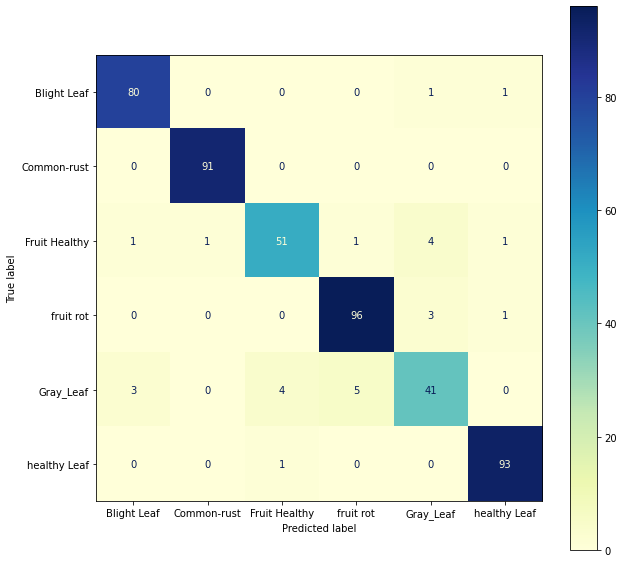

15/15 [==============================] - 0s 9ms/step - loss: 0.2008 - accuracy: 0.9436
Test Accuracy: 0.9436325430870056
Test loss : 0.20076803863048553
               precision    recall  f1-score   support

  Blight Leaf       0.95      0.98      0.96        82
  Common-rust       0.99      1.00      0.99        91
Fruit Healthy       0.91      0.86      0.89        59
    fruit rot       0.94      0.96      0.95       100
    Gray_Leaf       0.84      0.77      0.80        53
 healthy Leaf       0.97      0.99      0.98        94

     accuracy                           0.94       479
    macro avg       0.93      0.93      0.93       479
 weighted avg       0.94      0.94      0.94       479



In [85]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=model_2.predict([x_test])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_h = np.argmax(y_test,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_h, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = model_2.evaluate([x_test],y_test)
print('Test Accuracy:', score[1]) 
print('Test loss :', score[0])

from sklearn.metrics import classification_report

target_names = ['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf']
print(classification_report(round_pred_h, round_pred, target_names=target_names))

#VGG16 and Alex netConcatnation proposed model

In [41]:
from keras.layers.merge import concatenate
x1 =  model_1.get_layer('dense').output
x2 = model_2.get_layer('dense_1').output
x1 = Flatten()(x1)
x2 = Flatten()(x2)
out = concatenate([x1,x2])
out = Dense(6,activation='softmax')(out)
conc_model = Model(inputs = ([model_1.input,model_2.input]),outputs = out)
conc_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 conv2d_10_input (InputLayer)   [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_input (InputLayer)      [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_10 (Conv2D)             (None, 32, 32, 3)    84          ['conv2d_10_input[0][0]']        
                                                                                              

In [42]:
# tell the model what cost and optimization method to use
conc_model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [43]:
# fit the model
r = conc_model.fit([x_train,x_train],y_train,epochs=300,validation_data=([x_validation,x_validation],y_validation))

Epoch 1/300
70/70 [==============================] - 6s 53ms/step - loss: 1.6570 - accuracy: 0.3235 - val_loss: 1.5997 - val_accuracy: 0.2630
Epoch 2/300
70/70 [==============================] - 3s 44ms/step - loss: 1.3421 - accuracy: 0.6380 - val_loss: 1.4218 - val_accuracy: 0.4196
Epoch 3/300
70/70 [==============================] - 3s 49ms/step - loss: 1.1887 - accuracy: 0.8206 - val_loss: 1.2948 - val_accuracy: 0.6221
Epoch 4/300
70/70 [==============================] - 3s 46ms/step - loss: 1.0751 - accuracy: 0.8698 - val_loss: 1.1624 - val_accuracy: 0.7411
Epoch 5/300
70/70 [==============================] - 3s 44ms/step - loss: 0.9557 - accuracy: 0.9007 - val_loss: 0.9781 - val_accuracy: 0.8392
Epoch 6/300
70/70 [==============================] - 3s 44ms/step - loss: 0.8600 - accuracy: 0.9038 - val_loss: 0.8698 - val_accuracy: 0.8810
Epoch 7/300
70/70 [==============================] - 3s 45ms/step - loss: 0.7864 - accuracy: 0.9114 - val_loss: 0.7431 - val_accuracy: 0.9248
Epoch 

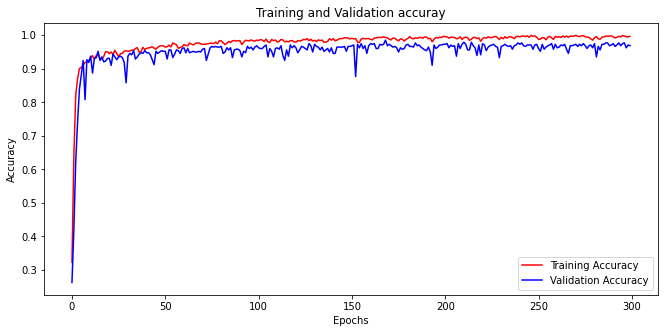

<Figure size 2160x1080 with 0 Axes>

In [70]:
acc = r.history['accuracy']

val_acc = r.history['val_accuracy']

#loss = r.history['loss']

#val_loss = r.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(11,5))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')

plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')

#plt.plot(epochs, loss,'', label = 'loss')

#plt.plot(epochs, val_loss,'', label = 'val loss')

plt.title('Training and Validation accuray')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend(loc=0)

plt.figure(figsize=(30,15))

#show the graph

plt.show()
#score = conc_model.evaluate(x_validation,y_validation)
#print('Training Accuracy:', score[1])
#print('Testing loss :', score[0])



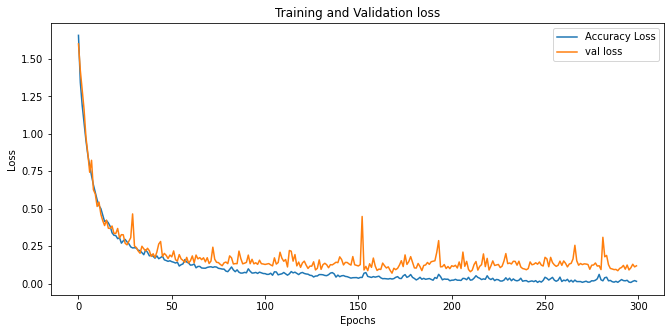

<Figure size 432x288 with 0 Axes>

In [73]:
acc = r.history['accuracy']

#val_acc = r.history['val_accuracy']

loss = r.history['loss']

val_loss = r.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(11,5))
 

#plt.plot(epochs, acc, 'r', label = 'Training Accuracy')

#plt.plot(epochs, val_acc, 'b', label= 'Validation Accuracy')

plt.plot(epochs, loss,'', label = 'Accuracy Loss')

plt.plot(epochs, val_loss,'', label = 'val loss')

plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(loc=0)

plt.figure()

#show the graph

plt.show()

<Figure size 2520x360 with 0 Axes>

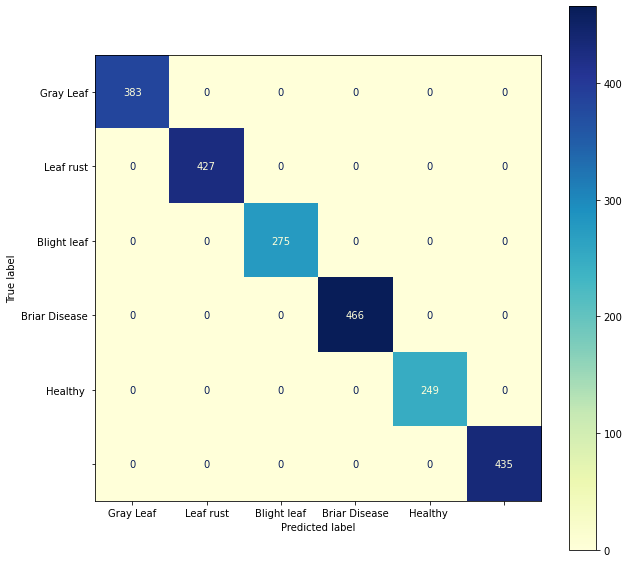

70/70 [==============================] - 1s 13ms/step - loss: 0.0036 - accuracy: 1.0000
Training Accuracy: 1.0
Training loss : 0.0036035687662661076
               precision    recall  f1-score   support

  Blight Leaf       1.00      1.00      1.00       383
  Common-rust       1.00      1.00      1.00       427
Fruit Healthy       1.00      1.00      1.00       275
    fruit rot       1.00      1.00      1.00       466
    Gray_Leaf       1.00      1.00      1.00       249
 healthy Leaf       1.00      1.00      1.00       435

     accuracy                           1.00      2235
    macro avg       1.00      1.00      1.00      2235
 weighted avg       1.00      1.00      1.00      2235



In [74]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=conc_model.predict([x_train,x_train])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_c = np.argmax(y_train,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_c, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Gray Leaf','Leaf rust','Blight leaf','Briar Disease','Healthy '])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = conc_model.evaluate([x_train,x_train],y_train)

print('Training Accuracy:', score[1]) 
print('Training loss :', score[0])

from sklearn.metrics import classification_report

target_names = ['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf']
print(classification_report(round_pred_c, round_pred, target_names=target_names))

<Figure size 2520x360 with 0 Axes>

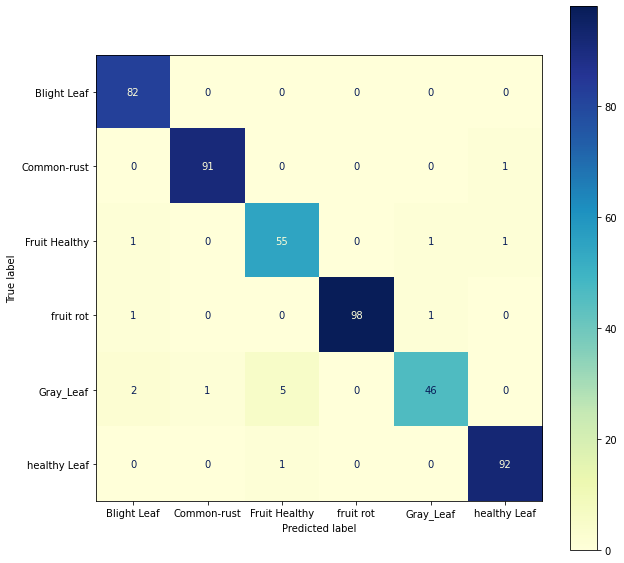

15/15 [==============================] - 0s 18ms/step - loss: 0.1187 - accuracy: 0.9687
Validation Accuracy: 0.968684732913971
validation loss : 0.11871244013309479
               precision    recall  f1-score   support

  Blight Leaf       0.95      1.00      0.98        82
  Common-rust       0.99      0.99      0.99        92
Fruit Healthy       0.90      0.95      0.92        58
    fruit rot       1.00      0.98      0.99       100
    Gray_Leaf       0.96      0.85      0.90        54
 healthy Leaf       0.98      0.99      0.98        93

     accuracy                           0.97       479
    macro avg       0.96      0.96      0.96       479
 weighted avg       0.97      0.97      0.97       479



In [67]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=conc_model.predict([x_validation,x_validation])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_d = np.argmax(y_validation,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_d, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = conc_model.evaluate([x_validation,x_validation],y_validation)
print('Validation Accuracy:', score[1]) 
print('validation loss :', score[0])

from sklearn.metrics import classification_report

target_names = ['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf']
print(classification_report(round_pred_d, round_pred, target_names=target_names))

<Figure size 2520x360 with 0 Axes>

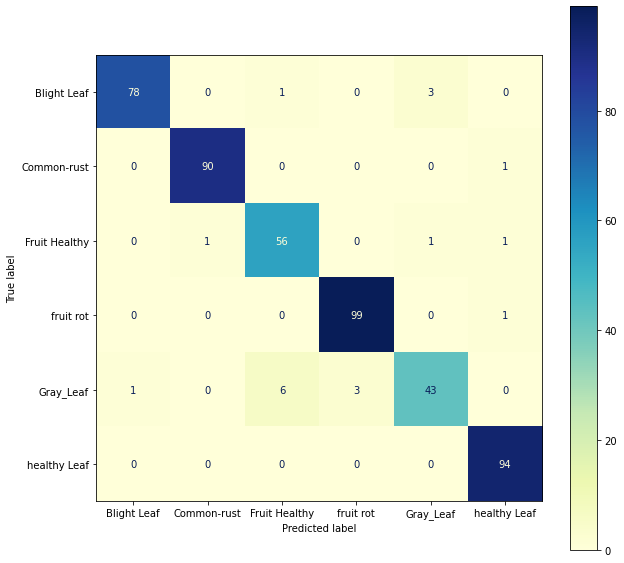

15/15 [==============================] - 0s 19ms/step - loss: 0.1731 - accuracy: 0.9603
Test Accuracy: 0.9603340029716492
Test loss : 0.17310002446174622
               precision    recall  f1-score   support

  Blight Leaf       0.99      0.95      0.97        82
  Common-rust       0.99      0.99      0.99        91
Fruit Healthy       0.89      0.95      0.92        59
    fruit rot       0.97      0.99      0.98       100
    Gray_Leaf       0.91      0.81      0.86        53
 healthy Leaf       0.97      1.00      0.98        94

     accuracy                           0.96       479
    macro avg       0.95      0.95      0.95       479
 weighted avg       0.96      0.96      0.96       479



In [68]:
from IPython.core.pylabtools import figsize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
pred=conc_model.predict([x_test,x_test])
plt.figure(figsize=(35,5))

round_pred = np.argmax(pred,axis=-1)
round_pred_e = np.argmax(y_test,axis=-1)

#print(round_pred)
fig,axis = plt.subplots(figsize=(10,10))
cm = confusion_matrix(round_pred_e, round_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf'])

#disp = ConfusionMatrixDisplay(confusion_matrix=cm)

#disp.plot(cmap='BuGn')#BuGn,GnBu,Greens,YlOrBr
disp.plot(cmap='YlGnBu',ax =axis)#BuGn,GnBu,Greens,YlOrBr,YlGnBu,Purples
plt.show()

score = conc_model.evaluate([x_test,x_test],y_test)
print('Test Accuracy:', score[1]) 
print('Test loss :', score[0])

from sklearn.metrics import classification_report

target_names = ['Blight Leaf','Common-rust','Fruit Healthy','fruit rot','Gray_Leaf','healthy Leaf']
print(classification_report(round_pred_e, round_pred, target_names=target_names))